# Lab 2

Tasks:
1. Image Preprocessing:
○ Use your own high-resolution photograph (minimum 1024x1024 pixels)
and convert the picture to grayscale to simplify the analysis.

2. Image Sampling:
○ Downsample the grayscale image to various resolutions (e.g., 512x512,
256x256, and 128x128 pixels) using nearest-neighbor interpolation.
○ Observe and interpret the details of each downsampled image's visual
changes and potential loss.

3. Image Quantization:
○ Quantize the grayscale image to different levels of intensity (e.g., 256 levels,
64 levels, and 4 levels).
○ Observe and interpret how the reduction in quantization levels affects the
image quality.

4. Visual and Quantitative Analysis:
○ Compare the original, downsampled, and quantized images by plotting
histograms of pixel values
○ Visualize the effect of quantization levels.
5. Error Metrics:
○ Calculate the Mean Squared Error (MSE) between the original image and
each downsampled and quantized image.

○ Interpret how these error metrics correlate with visual observations.

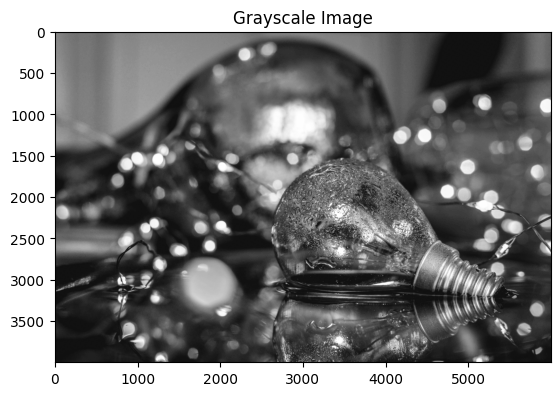

In [8]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Load a high-resolution image
image = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Computer Vision/lab-2-highres.jpg')
# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Display the grayscale image
plt.imshow(gray_image, cmap='gray')
plt.title('Grayscale Image')
plt.show()

In [5]:
# image Resolution
print(gray_image.shape)

(4000, 6000)


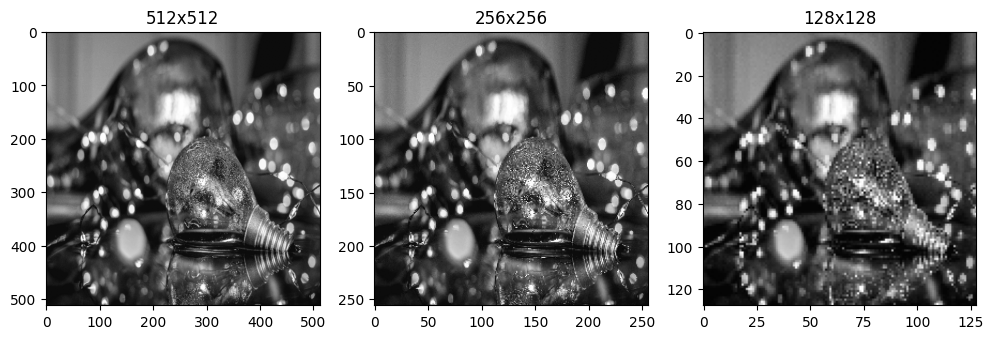

In [9]:
# Downsample using nearest-neighbor interpolation
downsampled_512 = cv2.resize(gray_image, (512, 512), interpolation=cv2.INTER_NEAREST)
downsampled_256 = cv2.resize(gray_image, (256, 256), interpolation=cv2.INTER_NEAREST)
downsampled_128 = cv2.resize(gray_image, (128, 128), interpolation=cv2.INTER_NEAREST)

# Display the downsampled images
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(downsampled_512, cmap='gray')
plt.title('512x512')

plt.subplot(1, 3, 2)
plt.imshow(downsampled_256, cmap='gray')
plt.title('256x256')

plt.subplot(1, 3, 3)
plt.imshow(downsampled_128, cmap='gray')
plt.title('128x128')

plt.show()

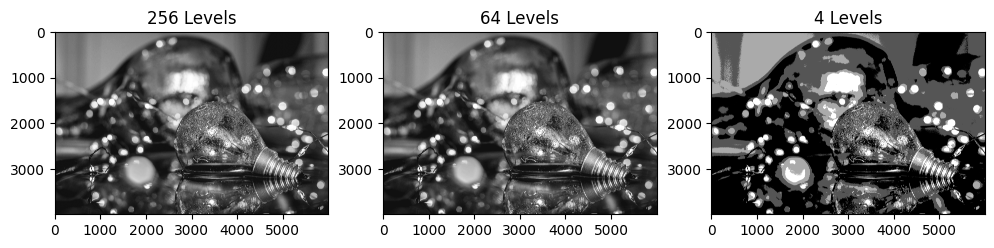

In [10]:
# Function to quantize the image
def quantize_image(image, levels):
    quantized = np.floor(image / (256 / levels)) * (256 / levels)
    return quantized.astype(np.uint8)

# Quantize the image to 256, 64, and 4 levels
quantized_256 = quantize_image(gray_image, 256)
quantized_64 = quantize_image(gray_image, 64)
quantized_4 = quantize_image(gray_image, 4)

# Display the quantized images
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(quantized_256, cmap='gray')
plt.title('256 Levels')

plt.subplot(1, 3, 2)
plt.imshow(quantized_64, cmap='gray')
plt.title('64 Levels')

plt.subplot(1, 3, 3)
plt.imshow(quantized_4, cmap='gray')
plt.title('4 Levels')

plt.show()

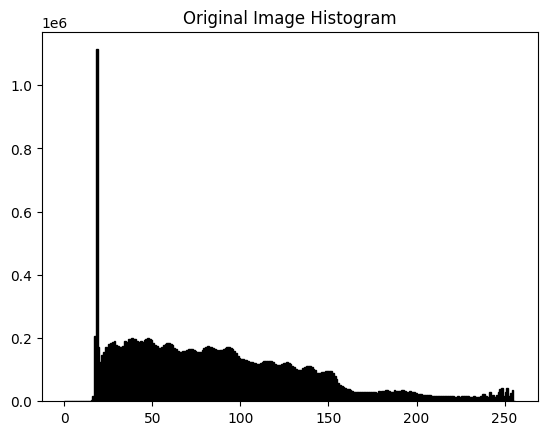

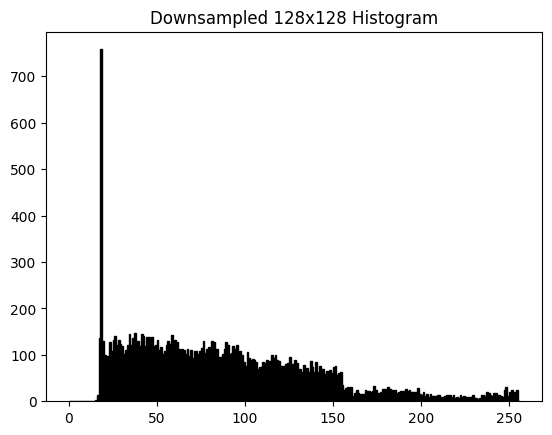

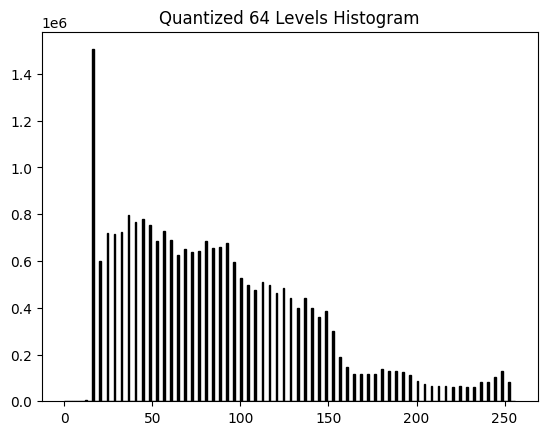

In [11]:
# Function to plot histograms of pixel values
def plot_histogram(image, title):
    plt.hist(image.ravel(), bins=256, range=(0, 256), fc='k', ec='k')
    plt.title(title)
    plt.show()

# Plot histograms for the original and processed images
plot_histogram(gray_image, 'Original Image Histogram')

plot_histogram(downsampled_128, 'Downsampled 128x128 Histogram')
plot_histogram(quantized_64, 'Quantized 64 Levels Histogram')


In [12]:
from sklearn.metrics import mean_squared_error

# Resizing the original image to match the size of downsampled images for MSE calculation
original_resized_512 = cv2.resize(gray_image, (512, 512), interpolation=cv2.INTER_LINEAR)
original_resized_256 = cv2.resize(gray_image, (256, 256), interpolation=cv2.INTER_LINEAR)
original_resized_128 = cv2.resize(gray_image, (128, 128), interpolation=cv2.INTER_LINEAR)

# MSE for downsampling
mse_downsampled_512 = mean_squared_error(original_resized_512, downsampled_512)
mse_downsampled_256 = mean_squared_error(original_resized_256, downsampled_256)
mse_downsampled_128 = mean_squared_error(original_resized_128, downsampled_128)

# MSE for quantization (resize original to 512x512 for comparison)
original_resized_quantized = cv2.resize(gray_image, (gray_image.shape[1], gray_image.shape[0]))
mse_quantized_256 = mean_squared_error(original_resized_quantized, quantized_256)
mse_quantized_64 = mean_squared_error(original_resized_quantized, quantized_64)
mse_quantized_4 = mean_squared_error(original_resized_quantized, quantized_4)

# Print MSE results
print(f'MSE (Downsampled 512x512): {mse_downsampled_512}')
print(f'MSE (Downsampled 256x256): {mse_downsampled_256}')
print(f'MSE (Downsampled 128x128): {mse_downsampled_128}')

print(f'MSE (Quantized 256 Levels): {mse_quantized_256}')
print(f'MSE (Quantized 64 Levels): {mse_quantized_64}')
print(f'MSE (Quantized 4 Levels): {mse_quantized_4}')

MSE (Downsampled 512x512): 31.897903442382812
MSE (Downsampled 256x256): 42.64149475097656
MSE (Downsampled 128x128): 57.1246337890625
MSE (Quantized 256 Levels): 0.0
MSE (Quantized 64 Levels): 3.529354916666667
MSE (Quantized 4 Levels): 105.24301258333334


# Interpretations

The histogram of the original image shows a wider spread of pixel values.
In downsampled images, the spread decreases, and certain ranges may dominate.
In quantized images, the histogram exhibits discrete peaks due to fewer intensity levels.

512x512: The image should retain most details but with some slight loss in sharpness.
256x256: Noticeable loss of detail and clarity, especially in fine textures.
128x128: Significant loss in resolution, making the image appear blocky with less fine detail.


Downsampling: The MSE increases as the resolution decreases, which corresponds to the loss of detail in the images.

Quantization: The MSE is higher for images with fewer intensity levels (e.g., 4 levels), reflecting the visible artifacts and quality loss.

 As observed visually, downsampling and quantization degrade image quality by removing fine details and introducing artifacts. The MSE values quantitatively support these observations, with higher MSE indicating more loss.